### set `folder_name`

In [13]:
name = "ANB2"

### imports and plot settings

In [14]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd
import scipy.signal as signal
import scipy.interpolate as interpolate
import pickle
import glob # find files in a directory
import re

from common.set_matplotlib_settings import set_matplotlib_settings
from common.sort_folders import sort_folders_by_day

### setup folders

In [15]:
output_folder = "../Data_Copy/AnalysisData/"+name+"/Speed_"+name+"/"
!mkdir {output_folder}

HitMovements_folders = sort_folders_by_day('../Data_Copy/AnalysisData/'+name+'/HitMovements_'+name+'_*/')

['../Data_Copy/AnalysisData/ANB2/HitMovements_ANB2_20231128_d13/', '../Data_Copy/AnalysisData/ANB2/HitMovements_ANB2_20231211_d22/']


### Get `var_s` and `mean_s`
- For each day, go to corresponding analysis2 folder
    - Find `mean_s` and `var_s` for that day:
        - For each movement from that day, get the total time it took to do the entire movement
        - Calculate an overall average speed defined as $\frac{100}{\text{time}}$ in units of % movement/s
    - Then, find the variance and mean of these average speeds, `var_s` and `mean_s`, respectively, for all movements from a day
    - Append to `vars_vs` and `mean_ss`

In [16]:
var_ss = []
mean_ss = []
num_ss = []
# loop through all analysis2 folders for each day
for HitMovements_folder in HitMovements_folders:

    vs = []
    # loop through all movements from that day
    for movement_file in glob.glob(HitMovements_folder+'movement_trial*.npy'):
        movement_data = np.load(movement_file)
        time = (movement_data[0, -1] - movement_data[0, 0])
        vs.append(100 / time)

    print("maximum time to complete movement:", 100 / np.min(vs) *1000, 'ms')
    print("minimum time to complete movement: ", 100 / np.max(vs) *1000, 'ms')
    var_ss.append(np.var(vs))
    mean_ss.append(np.mean(vs))
    num_ss.append(len(vs))
    
var_ss = np.array(var_ss)
mean_ss = np.array(mean_ss)
num_ss = np.array(num_ss)

maximum time to complete movement: 71934.13597718564 ms
minimum time to complete movement:  24.65028970780736 ms


maximum time to complete movement: 78045.14918682071 ms
minimum time to complete movement:  116.96279842817603 ms


### Plot `var_ss` and `mean_ss` across days

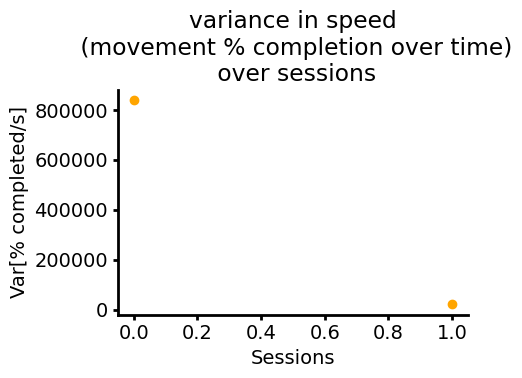

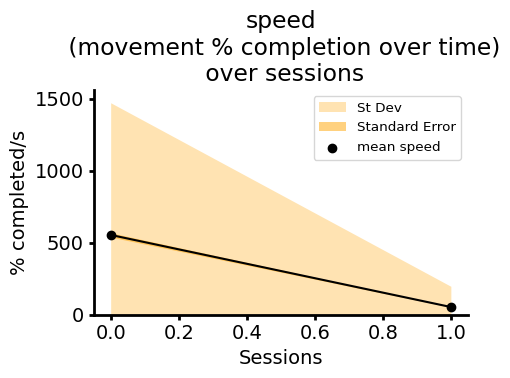

In [17]:
set_matplotlib_settings()

x_range = range(0, len(mean_ss))
std = np.sqrt(var_ss)
standard_error = np.sqrt(var_ss) / num_ss

plt.scatter(x_range, var_ss, color='orange')
plt.title('variance in speed\n (movement % completion over time)\n over sessions')
plt.ylabel("Var[% completed/s]")
plt.xlabel("Sessions")
plt.show()

plt.fill_between(x_range, mean_ss+std, mean_ss-std, color='orange', alpha=0.3, label='St Dev', zorder=1, linewidth=0.0)
plt.fill_between(x_range, mean_ss+standard_error, mean_ss-standard_error, color='orange', alpha=0.5, label='Standard Error', zorder=1, linewidth=0.0)
plt.plot(x_range, mean_ss, color='black', zorder=3)
plt.scatter(x_range, mean_ss, label="mean speed", color='black', zorder=3)
plt.title('speed\n (movement % completion over time)\n over sessions')
plt.ylabel('% completed/s')
plt.xlabel("Sessions")
plt.legend()
plt.ylim(bottom=0)
plt.show()

Save `var_ss` and `mean_ss`

In [18]:
np.save(output_folder+"var_ss", var_ss)
np.save(output_folder+"mean_ss", mean_ss)